In [1]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('proyecto_tweets_sample_anonimizados.csv',encoding='iso-8859-3',encoding_errors='replace',sep=';')

# Mostrar las primeras filas del dataframe para entender cómo se ven los datos
print(df.head())

df.head().to_csv("head.csv")

   Column1    user_id    status_id        created_at is_retweet is_quote  \
0        0   user1681  tweet164722  24-10-2019 23:28      FALSO    FALSO   
1        1   user1681  tweet142612   23-10-2019 2:27      FALSO    FALSO   
2        2   user1681  tweet142889   23-10-2019 2:43      FALSO    FALSO   
3        3  user11284  tweet114988  21-10-2019 18:55      FALSO    FALSO   
4        4  user11284   tweet28901  11-10-2019 13:04      FALSO    FALSO   

  is_reply lang                                               text  \
0    FALSO   es  @sebastianpinera el país se aburrió de ti y tu...   
1    FALSO   es          Lo están borrando https://t.co/QCE7c1dWSb   
2    FALSO   es          Lo están borrando https://t.co/bAAkjDMhaX   
3    FALSO   es  Augusto PIÑECHET...es el nuevo nombre que la p...   
4    FALSO   es  Después de un año con licencias médicas, compr...   

   created_at_int  hora  dia  
0       201910240    23    5  
1       201910230     2    4  
2       201910230     2    4 

In [2]:
# Obtener los nombres de las columnas
print("Nombres de las columnas:", df.columns.tolist())

df.dtypes.to_csv("columns.csv")


Nombres de las columnas: ['Column1', 'user_id', 'status_id', 'created_at', 'is_retweet', 'is_quote', 'is_reply', 'lang', 'text', 'created_at_int', 'hora', 'dia']


In [3]:
# Revisar los tipos de datos de cada columna
print("Tipos de datos de las columnas:", df.dtypes)

df.dtypes.to_csv("dtypes.csv")

Tipos de datos de las columnas: Column1            int64
user_id           object
status_id         object
created_at        object
is_retweet        object
is_quote          object
is_reply          object
lang              object
text              object
created_at_int     int64
hora               int64
dia                int64
dtype: object


In [4]:
# Obtener un resumen estadístico de las columnas numéricas
print("Estadísticas descriptivas:")
print(df.describe())

df.describe().to_csv("describe.csv")

Estadísticas descriptivas:
             Column1  created_at_int           hora            dia
count  317328.000000    3.173280e+05  317328.000000  317328.000000
mean   158663.500000    2.019106e+08      12.074541       3.918882
std     91604.847448    4.404024e+02       7.923907       2.017672
min         0.000000    2.019100e+08       0.000000       1.000000
25%     79331.750000    2.019102e+08       3.000000       2.000000
50%    158663.500000    2.019103e+08      14.000000       4.000000
75%    237995.250000    2.019111e+08      19.000000       6.000000
max    317327.000000    2.019112e+08      23.000000       7.000000


In [5]:
# Preparar un DataFrame para almacenar información adicional, inicializando con tipo object
info_df = pd.DataFrame(index=['count', 'nunique', 'top', 'freq'], columns=df.columns).astype('object')

# Contar valores no nulos y únicos para cada columna y asignarlos
info_df.loc['count'] = df.count()
info_df.loc['nunique'] = df.nunique()

# Agregar la información del valor más común y su frecuencia
for col in df.columns:
    top = df[col].value_counts().idxmax()
    freq = df[col].value_counts().max()
    info_df.at['top', col] = top
    info_df.at['freq', col] = freq

print(info_df)

info_df.to_csv("info_df.csv")

        Column1   user_id    status_id       created_at is_retweet is_quote  \
count    317328    317328       317328           317328     317328   317328   
nunique  317328      8399       317159            56741          1        1   
top           0  user4799  tweet126601  13-11-2019 1:38      FALSO    FALSO   
freq          1      1241            2              203     317328   317328   

        is_reply    lang       text created_at_int    hora     dia  
count     317328  317328     317328         317328  317328  317328  
nunique        1       1     316484             46      24       7  
top        FALSO      es  #żNOMBRE?      201910210       0       2  
freq      317328  317328         41          19677   26654   58603  


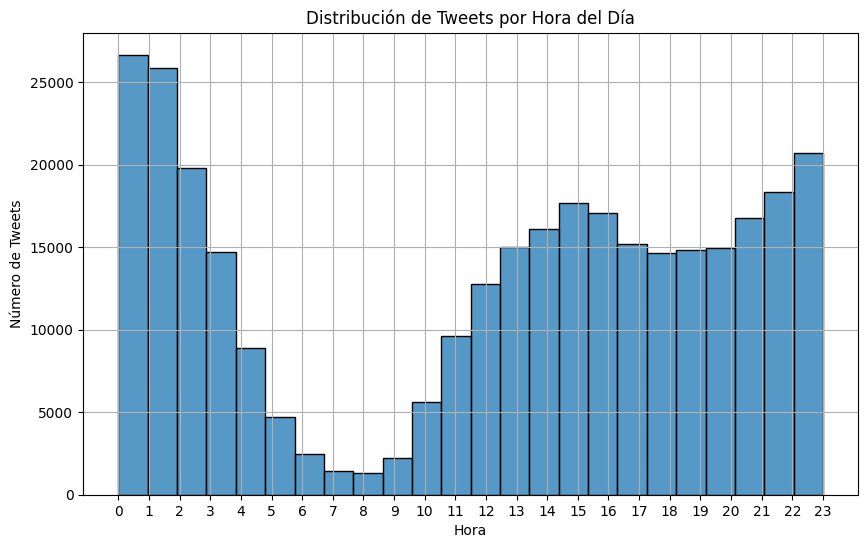

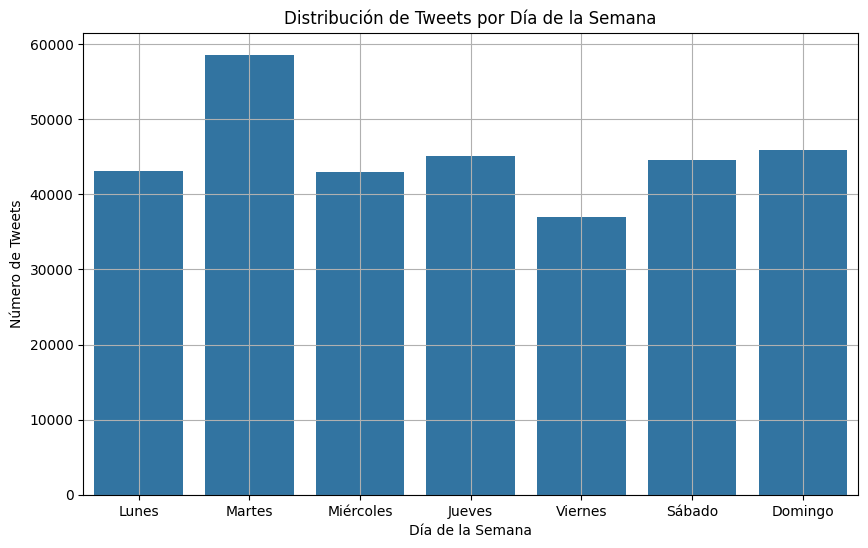

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Histograma de tweets por hora del día
plt.figure(figsize=(10, 6))
sns.histplot(df['hora'], bins=24, kde=False)
plt.title('Distribución de Tweets por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Número de Tweets')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Distribución de tweets por día de la semana
plt.figure(figsize=(10, 6))
sns.countplot(x='dia', data=df)
plt.title('Distribución de Tweets por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Tweets')
plt.xticks(range(0, 7), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.grid(True)
plt.show()



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ignacio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


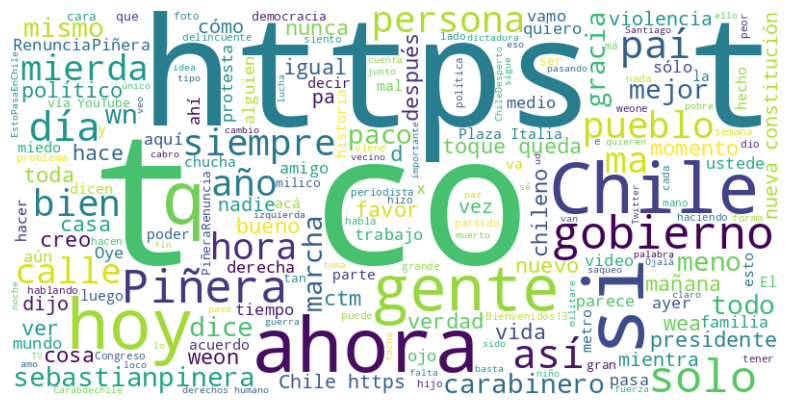

In [7]:
import nltk
from nltk.corpus import stopwords

# Descargar las stop words
nltk.download('stopwords')

# Cargar las stop words en español
stop_words = set(stopwords.words('spanish'))


from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Asumiendo que df['text'] es tu columna de texto
text = ' '.join(df['text'].dropna())

# Filtrar las stop words
filtered_words = ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Generar la nube de palabras con el texto filtrado
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(filtered_words)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ignacio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


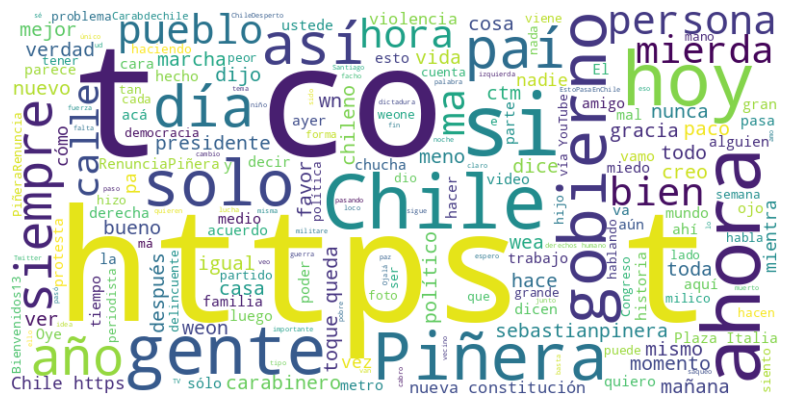

In [8]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descargar y cargar las stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Agregar palabras adicionales a las stop words
additional_stopwords = {'el', 't'}  # Agrega aquí cualquier otra palabra que quieras excluir
stop_words.update(additional_stopwords)

# Suponiendo que 'df['text']' es tu columna de texto
text = ' '.join(df['text'].dropna())

# Filtrar las stop words y caracteres aislados
filtered_words = ' '.join([word for word in text.split() if (word.lower() not in stop_words and len(word) > 1)])

# Generar la nube de palabras con el texto filtrado
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(filtered_words)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ignacio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


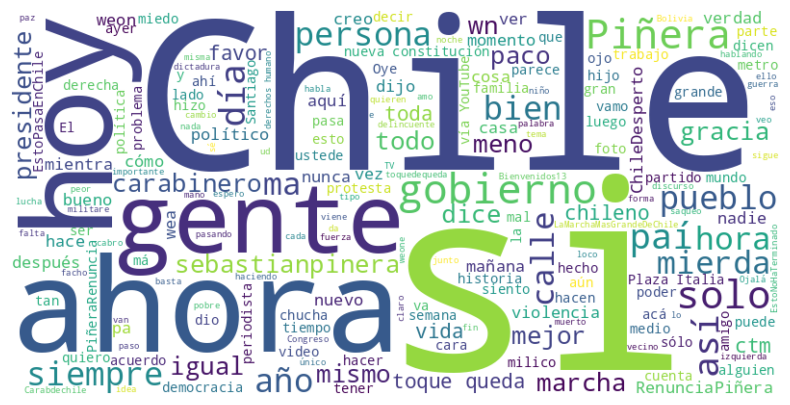

In [9]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re  # Importamos la librería de expresiones regulares

# Descargar y cargar las stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Agregar palabras adicionales a las stop words
additional_stopwords = {'el'}  # Agrega aquí cualquier otra palabra que quieras excluir
stop_words.update(additional_stopwords)

# Suponiendo que 'df['text']' es tu columna de texto
text = ' '.join(df['text'].dropna())

# Eliminar URLs
text = re.sub(r'http\S+', '', text)

# Filtrar las stop words y caracteres aislados
filtered_words = ' '.join([word for word in text.split() if (word.lower() not in stop_words and len(word) > 1)])

# Generar la nube de palabras con el texto filtrado
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(filtered_words)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [10]:
# Asegurarte de que la columna 'created_at' esté en formato de fecha
df['created_at'] = pd.to_datetime(df['created_at'], dayfirst=True, errors='coerce')


In [11]:
import re
from nltk.corpus import stopwords
import nltk

# Descargar stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Función para limpiar el texto
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Quitar URLs
    text = re.sub(r'@\w+', '', text)     # Quitar menciones
    text = re.sub(r'[^A-Za-záéíóúñÁÉÍÓÚÑ ]', '', text)  # Quitar puntuación y números
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return text

# Limpiar el texto en el DataFrame
df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ignacio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt


import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
spanish_stop_words = stopwords.words('spanish')

# Inicializar CountVectorizer con las palabras de parada en español
vectorizer = CountVectorizer(stop_words=spanish_stop_words)

# Convertir los documentos de texto a una matriz de conteo de tokens
data_vectorized = vectorizer.fit_transform(df['clean_text'].dropna())


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ignacio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Número de tópicos
num_topics = 5

# Crear y ajustar el modelo LDA
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10, learning_method='online', random_state=0)
lda.fit(data_vectorized)

# Mostrar los tópicos identificados
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-6:-1]]))


Topic 0:
gobierno piñera años si personas
Topic 1:
hoy presidente bien día mañana
Topic 2:
piñera vía constitución mas nueva
Topic 3:
chile gente pueblo pacos ahora
Topic 4:
ser si quiero paz debe


In [14]:
import pandas as pd

# Lista para almacenar los tópicos
topics = []

for topic_idx, topic in enumerate(lda.components_):
    topic_features = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    topics.append([f"Topic {topic_idx}"] + topic_features)

# Crear un DataFrame
df_topics = pd.DataFrame(topics, columns=["Topic", "Word 1", "Word 2", "Word 3", "Word 4", "Word 5"])

# Guardar en CSV
df_topics.to_csv("lda_topics.csv", index=False)


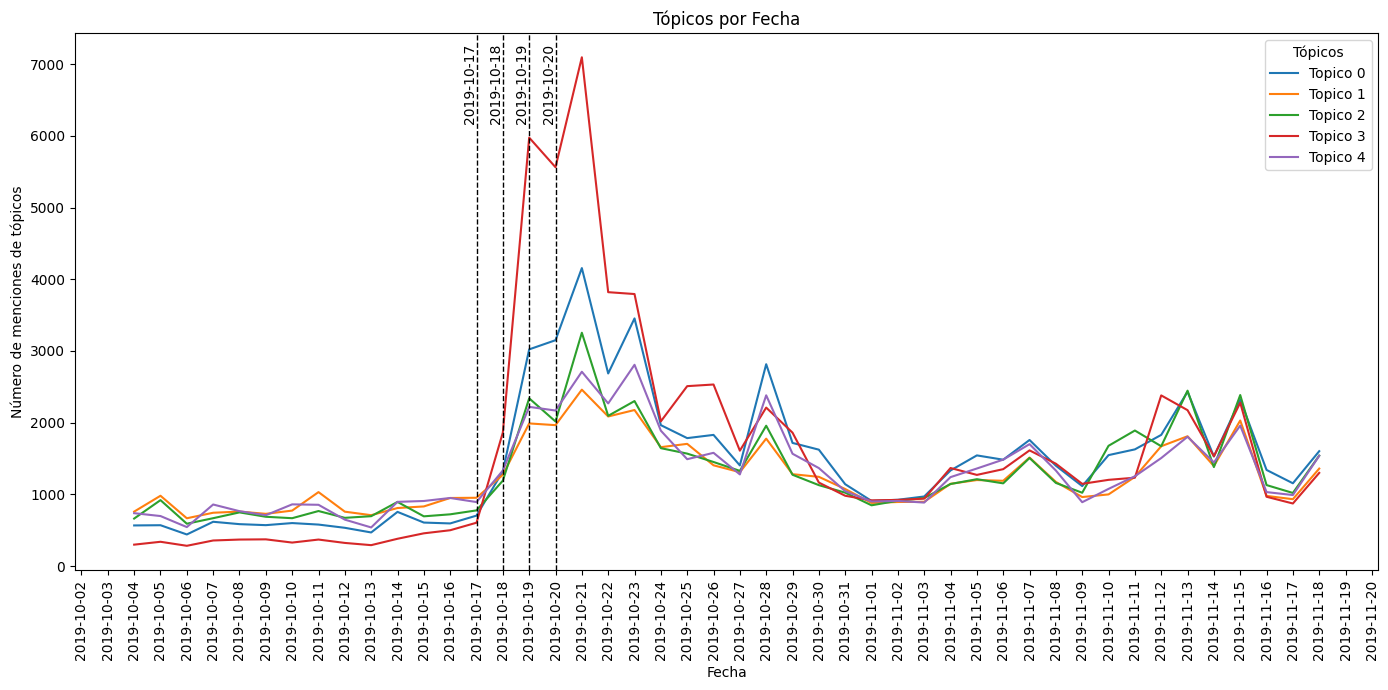

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Asignar el tópico más dominante a cada documento
dominant_topic = lda.transform(data_vectorized).argmax(axis=1)
df['dominant_topic'] = dominant_topic

# Asegurarse de que 'created_at' es una columna de fecha
df['created_at'] = pd.to_datetime(df['created_at'])

# Agrupar por fecha y tópico
topic_counts = df.groupby([df['created_at'].dt.date, 'dominant_topic']).size().unstack(fill_value=0)

# Graficar
plt.figure(figsize=(14, 7))
for topic in topic_counts.columns:
    plt.plot(topic_counts.index, topic_counts[topic], label=f'Topico {topic}')

# Días para agregar las líneas verticales y anotaciones
important_dates = ['2019-10-17', '2019-10-18', '2019-10-19', '2019-10-20']
for date in important_dates:
    plt.axvline(pd.to_datetime(date), color='k', linestyle='--', lw=1)
    plt.text(pd.to_datetime(date), plt.ylim()[1] * 0.98, date, rotation=90, verticalalignment='top', horizontalalignment='right')

# Restaurar las etiquetas del eje x para mostrar todas las fechas
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90)

plt.title('Tópicos por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de menciones de tópicos')
plt.legend(title='Tópicos')
plt.tight_layout()  # Ajusta la disposición para que todo quepa bien
plt.show()

